# 4th - investigating model feature importance with exclusion loss

In [1]:
import pickle
import pandas as pd
import paintone_rsn.mlfunctions as myml
import numpy as np
from paintone_rsn.data_loading import  samplecalibration, load_subjectiid, exclusion, load_timeseries
from paintone_rsn.data_preproc import connectivity_matrix
from paintone_rsn.visualization import interestingrois
import matplotlib.pyplot as plt

c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\nilearn\datasets\__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
#Load timeseires data fro all datasets
# load discovery sample subjects' timeseries
pathtodiscoversmpl="C:/Users/lenov/PycharmProjects/paintone_rsn/data_in/discovery_smpl/"
s0_dict_subjID_idx = load_subjectiid(pathtodiscoversmpl+'subjectsIDs.txt')
s0_subjID_idx_incl, s0_subjID_idx_excl,s0_motioninf_curr = exclusion(pathtodiscoversmpl+'motion_summary.csv',
                                             dict_subjID_idx=s0_dict_subjID_idx,
                                             excl_subj=[8,18,31])
# Reason of exclusion
# -subj 8 felt asleep in the scanner
# -subj 18 - missing behavior data
# -subj 31 - missing mri data
timeseries_s0,\
labels,\
loadedsubjpath,\
vectorizedlabels,\
listoflabelpairs = load_timeseries(pathtodiscoversmpl+'regional_timeseries/',
                                   s0_subjID_idx_incl.values(),
                                   fddir=[pathtodiscoversmpl+"calculate_FD_Power/mapflow/"],
                                   numofexlcvolsatthebeg=0)
#calculate the connectivity matrix based on the timeseries and vectorize them
X, cm = connectivity_matrix(timeseries_s0)

# convert the connectivity matrix to a pandsa dataframe
s0_features_scr = pd.DataFrame(X,
            columns=(vectorizedlabels),
            index = s0_subjID_idx_incl.keys())
pathtodiscoversmpl="C:/Users/lenov/PycharmProjects/paintone_rsn/data_in/discovery_smpl/"
discovery_behav = pd.read_pickle("C:/Users/lenov/PycharmProjects/paintone_rsn/data_in/discovery_smpl/discovery_smpl_behav.pkl")

These are the subjects subjectID who were excluded:	dict_keys([4, 7, 8, 14, 16, 18, 22, 24, 25, 29, 36, 43, 44])
These are the subjects ordererID who were excluded:	dict_values([1, 3, 4, 7, 9, 11, 15, 17, 18, 21, 26, 33, 34])
These are the subjects subjectID who were included:	dict_keys([3, 5, 9, 12, 15, 17, 19, 20, 21, 23, 27, 28, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 45, 46, 47])
These are the subjects ordererID who were included:	dict_values([0, 2, 5, 6, 8, 10, 12, 13, 14, 16, 19, 20, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 35, 36, 37])
In total we work with	25	 participants.
 Check if all the aprticipanst have behavior data!!!!
Number of participant excluded based in the motion parameters(FD>0.15,scrubbed percent>25):11
this is their subjID 	4	and this is thier orderID:	1
this is their subjID 	7	and this is thier orderID:	3
this is their subjID 	8	and this is thier orderID:	4
this is their subjID 	14	and this is thier orderID:	7
this is their subjID 	16	and this is thier orderID:

In [3]:
# load validation sample 1 timeseries
pathtovalidationsmpl_1="C:/Users/lenov/PycharmProjects/paintone_rsn/data_in/validation_smpl1/"
s1_dict_subjID_idx = load_subjectiid(pathtovalidationsmpl_1+'subjectsIDs.txt')
s1_subjID_idx_incl, subjID_idx_excl,motioninf_curr = exclusion(pathtovalidationsmpl_1+'motion_summary.csv',
                                             dict_subjID_idx=s1_dict_subjID_idx,
                                             excl_subj=[5,32]) #8,17,20,24,26,
# 5-felt asleep during the scan,but he is removed anyway bc of motion
# 32-incidental finding, registration does not work well
timeseries_vs1, \
labels_vs1, \
loadedsubjpath_vs1, \
vectorizedlabels_vs1, \
listoflabelpairs_vs1 = load_timeseries(pathtovalidationsmpl_1+'regional_timeseries/',
                                   s1_subjID_idx_incl.values(),
                                   fddir=[pathtovalidationsmpl_1+"calculate_FD_Power/mapflow/"],
                                   numofexlcvolsatthebeg=0)

These are the subjects subjectID who were excluded:	dict_keys([5, 8, 10, 20, 25, 30, 32])
These are the subjects ordererID who were excluded:	dict_values([4, 7, 9, 19, 24, 29, 31])
These are the subjects subjectID who were included:	dict_keys([1, 2, 3, 4, 6, 7, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 26, 27, 28, 29, 31, 33])
These are the subjects ordererID who were included:	dict_values([0, 1, 2, 3, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 28, 30, 32])
In total we work with	26	 participants.
 Check if all the aprticipanst have behavior data!!!!
Number of participant excluded based in the motion parameters(FD>0.15,scrubbed percent>25):5
this is their subjID 	5	and this is thier orderID:	4
this is their subjID 	8	and this is thier orderID:	7
this is their subjID 	10	and this is thier orderID:	9
this is their subjID 	20	and this is thier orderID:	19
this is their subjID 	25	and this is thier orderID:	24
this is their subjID 	30	and this is t

In [4]:
# load validation sample 2 timeseries
pathtovalidationsmpl_2="C:/Users/lenov/PycharmProjects/paintone_rsn/data_in/validation_smpl2/"
dict_subjID_idx_vs2 = load_subjectiid(pathtovalidationsmpl_2+'subjectsIDs.txt')
subjID_idx_incl_vs2, subjID_idx_excl_vs2, motioninf_vs2 = exclusion(pathtovalidationsmpl_2+'motion_summary.csv',
                                             dict_subjID_idx=dict_subjID_idx_vs2,
                                             excl_subj=[])
# consider removing subj
timeseries_vs2, \
labels_vs2, \
loadedsubjpath_vs2, \
vectorizedlabels_vs2, \
listoflabelpairs_vs2 = load_timeseries(pathtovalidationsmpl_2+'regional_timeseries/',
                                          subjID_idx_incl_vs2.values(),
                                          fddir=[pathtovalidationsmpl_2+"calculate_FD_Power/mapflow/"],
                                          numofexlcvolsatthebeg=0)

These are the subjects subjectID who were excluded:	dict_keys([1049, 1092, 1093, 1113, 1117])
These are the subjects ordererID who were excluded:	dict_values([7, 18, 19, 25, 26])
These are the subjects subjectID who were included:	dict_keys([1015, 1022, 1029, 1032, 1037, 1039, 1048, 1053, 1055, 1060, 1066, 1067, 1074, 1076, 1077, 1083, 1089, 1094, 1096, 1097, 1108, 1111, 1118])
These are the subjects ordererID who were included:	dict_values([0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 27])
In total we work with	23	 participants.
 Check if all the aprticipanst have behavior data!!!!
Number of participant excluded based in the motion parameters(FD>0.15,scrubbed percent>25):5
this is their subjID 	1049	and this is thier orderID:	7
this is their subjID 	1092	and this is thier orderID:	18
this is their subjID 	1093	and this is thier orderID:	19
this is their subjID 	1113	and this is thier orderID:	25
this is their subjID 	1117	and this is thier orderID:	26

# Leave one out feature analysis

In [5]:
#load pooled behavior, feature
concat_behav = pd.read_csv("C:/Users/lenov/PycharmProjects/paintone_rsn/data_in/validation_pooled/validation_pooled_behav.csv")
concat_feature=pd.read_csv("C:/Users/lenov/PycharmProjects/paintone_rsn/data_in/validation_pooled/validation_pooled_feature.csv",
                           index_col=0)
#load model
filename = 'C:/Users/lenov/PycharmProjects/paintone_rsn/data_out/final_model_M1.sav'
m_scr = pickle.load(open(filename, 'rb'))
#load model trained on leave one out feature
#with open("C:/Users/lenov/Documents/Katistudy/C_statistics/outputsfromnotebooks/M1_scr/modelinvestigation_lofo/m2_loof_all.pkl", "rb") as fpp:   # Unpickling
#    m1_scr_loof_all = pickle.load(fpp)

In [6]:
a,r2_orig,res,regl=myml.pred_stat(concat_behav['y_valpainlearn_acq'],
               concat_behav['prediction_scr_calib'],#m_scr.predict(concat_feature), #s1_features_scr
               robust=False,
               regside='greater')
print('This is the explained variance in the pooled dataset: '+ str(round(r2_orig,2)*100) + '%')

This is the explained variance in the pooled dataset: 11.0%


Leave one feature out from the M_scr model and save the new models explained variance.
The shape of the new feature space: (25, 7502)
**** Non-nested analysis ****
** Best hyperparameters: {'fsel__k': 10, 'model__alpha': 0.001}
** Score on full data as training set:	-17.891421665918525
** Score on mean as model: -543.4399999999999
** Best Non-nested cross-validated score on test:	-223.95276768931944
XXXXX Explained Variance: 0.5878978954634928
R2=0.656  R=0.810   p=0.000001  Expl. Var.: 58.8%  Expl. Var.2: 58.9%  MSE=223.953 RMSE=14.965  MAE=10.981 MedAE=9.604  R^2=0.588


c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


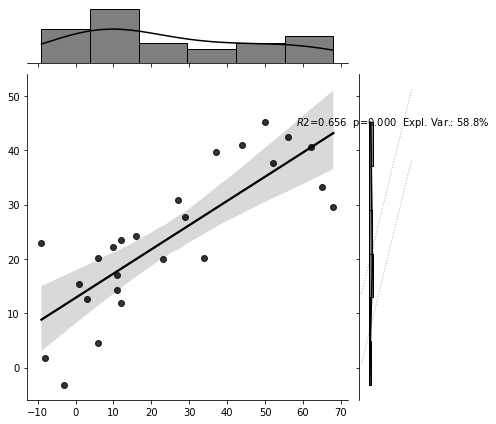

The shape of the new feature space: (25, 7502)
**** Non-nested analysis ****
** Best hyperparameters: {'fsel__k': 30, 'model__alpha': 0.001}
** Score on full data as training set:	-0.2042721037731801
** Score on mean as model: -543.4399999999999
** Best Non-nested cross-validated score on test:	-300.04820144565593
XXXXX Explained Variance: 0.447872439559738
R2=0.464  R=0.681   p=0.000179  Expl. Var.: 44.8%  Expl. Var.2: 45.2%  MSE=300.048 RMSE=17.322  MAE=15.179 MedAE=13.875  R^2=0.448


c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


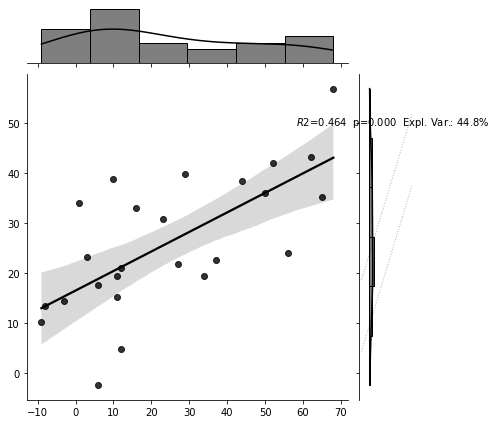

The shape of the new feature space: (25, 7502)
**** Non-nested analysis ****
** Best hyperparameters: {'fsel__k': 10, 'model__alpha': 0.001}
** Score on full data as training set:	-21.83329940485742
** Score on mean as model: -543.4399999999999
** Best Non-nested cross-validated score on test:	-268.4600218550244
XXXXX Explained Variance: 0.5059987821010149
R2=0.542  R=0.736   p=0.000027  Expl. Var.: 50.6%  Expl. Var.2: 50.9%  MSE=268.460 RMSE=16.385  MAE=12.338 MedAE=9.724  R^2=0.506


c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


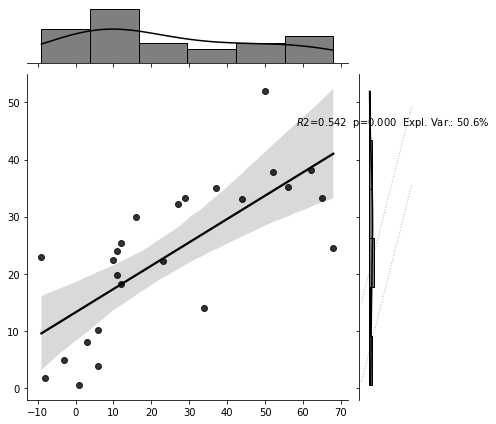

The shape of the new feature space: (25, 7502)
**** Non-nested analysis ****
** Best hyperparameters: {'fsel__k': 40, 'model__alpha': 0.001}
** Score on full data as training set:	-0.023300920840677142
** Score on mean as model: -543.4399999999999
** Best Non-nested cross-validated score on test:	-330.38842118109
XXXXX Explained Variance: 0.3920425048191336
R2=0.433  R=0.658   p=0.000350  Expl. Var.: 39.2%  Expl. Var.2: 39.5%  MSE=330.388 RMSE=18.177  MAE=15.467 MedAE=12.606  R^2=0.392


c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


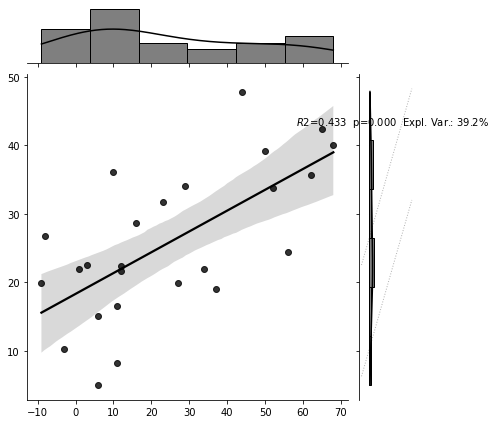

The shape of the new feature space: (25, 7502)
**** Non-nested analysis ****
** Best hyperparameters: {'fsel__k': 40, 'model__alpha': 0.001}
** Score on full data as training set:	-0.03754806079757829
** Score on mean as model: -543.4399999999999
** Best Non-nested cross-validated score on test:	-380.5435665217716
XXXXX Explained Variance: 0.29975054003795887
R2=0.317  R=0.563   p=0.003373  Expl. Var.: 30.0%  Expl. Var.2: 30.4%  MSE=380.544 RMSE=19.508  MAE=16.780 MedAE=15.828  R^2=0.300


c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


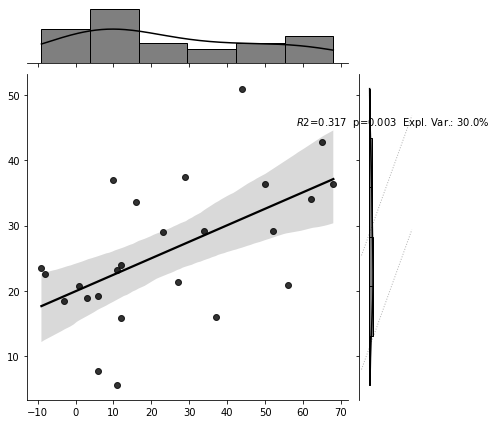

The shape of the new feature space: (25, 7502)
**** Non-nested analysis ****
** Best hyperparameters: {'fsel__k': 10, 'model__alpha': 0.001}
** Score on full data as training set:	-19.128315414099415
** Score on mean as model: -543.4399999999999
** Best Non-nested cross-validated score on test:	-244.07175767032743
XXXXX Explained Variance: 0.5508763475814672
R2=0.624  R=0.790   p=0.000003  Expl. Var.: 55.1%  Expl. Var.2: 55.2%  MSE=244.072 RMSE=15.623  MAE=11.605 MedAE=8.059  R^2=0.551


c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


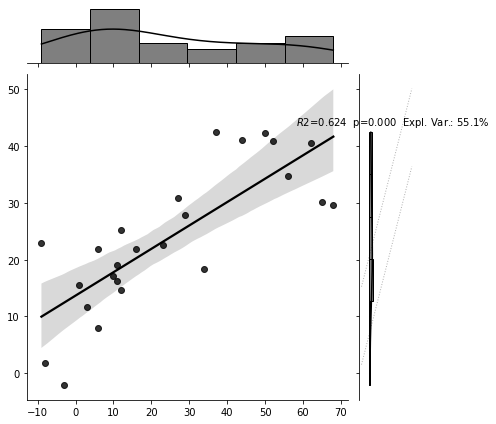

The shape of the new feature space: (25, 7502)
**** Non-nested analysis ****
** Best hyperparameters: {'fsel__k': 10, 'model__alpha': 0.001}
** Score on full data as training set:	-16.899991019723245
** Score on mean as model: -543.4399999999999
** Best Non-nested cross-validated score on test:	-226.8655480213955
XXXXX Explained Variance: 0.5825380023159953
R2=0.671  R=0.819   p=0.000001  Expl. Var.: 58.3%  Expl. Var.2: 58.4%  MSE=226.866 RMSE=15.062  MAE=11.483 MedAE=9.706  R^2=0.583


c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


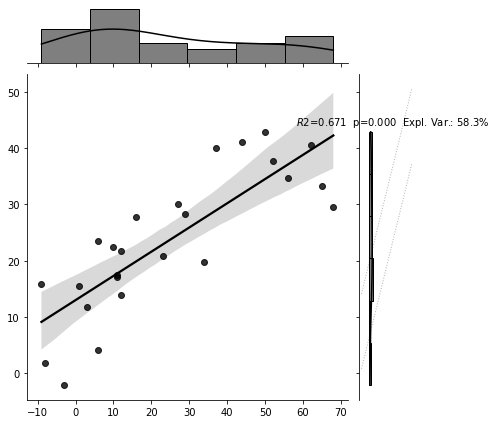

The shape of the new feature space: (25, 7502)
**** Non-nested analysis ****
** Best hyperparameters: {'fsel__k': 10, 'model__alpha': 0.001}
** Score on full data as training set:	-26.2494573972713
** Score on mean as model: -543.4399999999999
** Best Non-nested cross-validated score on test:	-285.4721521174682
XXXXX Explained Variance: 0.4746942585796624
R2=0.564  R=0.751   p=0.000015  Expl. Var.: 47.5%  Expl. Var.2: 47.8%  MSE=285.472 RMSE=16.896  MAE=13.837 MedAE=11.866  R^2=0.475


c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


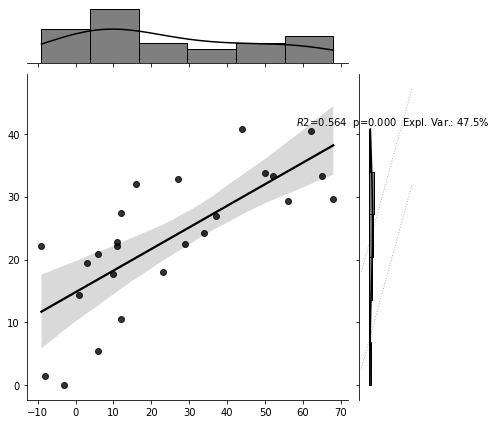

The shape of the new feature space: (25, 7502)
**** Non-nested analysis ****
** Best hyperparameters: {'fsel__k': 10, 'model__alpha': 0.001}
** Score on full data as training set:	-28.460652194616014
** Score on mean as model: -543.4399999999999
** Best Non-nested cross-validated score on test:	-314.5820337289581
XXXXX Explained Variance: 0.4211283053714152
R2=0.486  R=0.697   p=0.000108  Expl. Var.: 42.1%  Expl. Var.2: 42.1%  MSE=314.582 RMSE=17.736  MAE=14.046 MedAE=10.704  R^2=0.421


c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


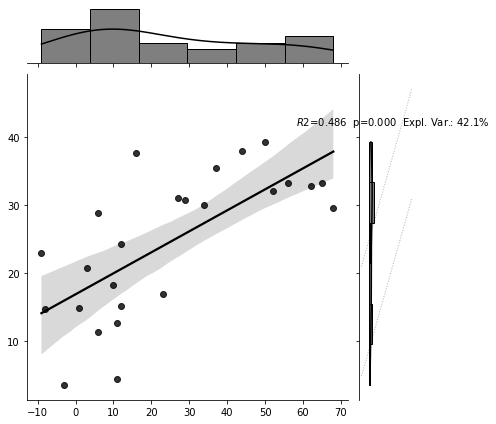

The shape of the new feature space: (25, 7502)
**** Non-nested analysis ****
** Best hyperparameters: {'fsel__k': 10, 'model__alpha': 0.001}
** Score on full data as training set:	-17.922287541240838
** Score on mean as model: -543.4399999999999
** Best Non-nested cross-validated score on test:	-204.11280849313408
XXXXX Explained Variance: 0.6244059905543683
R2=0.718  R=0.847   p=0.000000  Expl. Var.: 62.4%  Expl. Var.2: 62.7%  MSE=204.113 RMSE=14.287  MAE=10.775 MedAE=9.724  R^2=0.624


c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


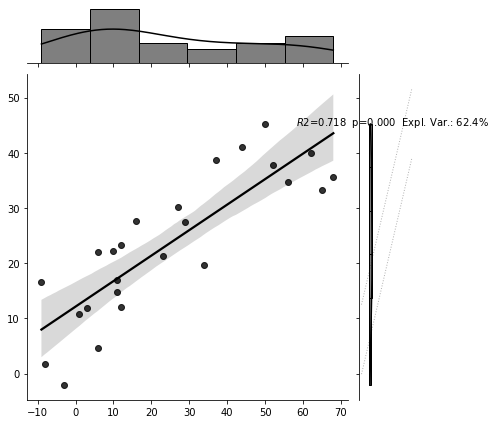

In [7]:
# train the leave on out feature models and keep it for further use.
print('Leave one feature out from the M_scr model and save the new models explained variance.')
X_ridg = s0_features_scr.to_numpy()
y_ridg = discovery_behav['y_valpainlearn_acq'].to_numpy() #y_predictor
model_lofo = m_scr
mymodel, p_grid = myml.pipe_scale_fsel_ridge_noscaler()
explvar_all = []
m0_scr_loof_all = []
predictions_all = []
for feature in model_lofo[0].get_support(indices=True):
    X_ridg_loof = np.delete(X_ridg,feature,axis=1)
    print('The shape of the new feature space:', X_ridg_loof.shape)
    mo_scr_loof, prediction, explvar  = myml.mytrain(X_ridg_loof,
                                                                  y_ridg,
                                                                  mymodel,
                                                                  p_grid,
                                                                  nested=False)[0:3]
    # avg_model, all_M1_models, mycrossval, myfig,
    myprediction = myml.evaluate_crossval_prediction(mo_scr_loof,X_ridg_loof, y_ridg,outfile=[])
    predictions_all.append(prediction)
    explvar_all.append(explvar)
    m0_scr_loof_all.append(mo_scr_loof)

In [15]:
#lofo_filename='C:/Users/lenov/PycharmProjects/paintone_rsn/data_out/final_model_M1_lofo.sav'
#with open(loro_filename,'wb') as fp:
#    pickle.dump(m0_scr_loof_all,fp)
#m0_scr_loof_all = pickle.load(open(lofo_filename, 'rb'))

The left out connection: POsul_v+SPlob.1
The number of features in the new model: 10
This is the reduction of explained variance(in 
absolute %,positive value means a drop while negative
 value means the expl variance increased when we omitted th region): -2.0


c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y.

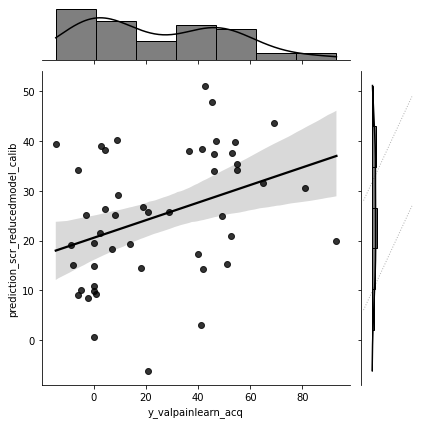

The left out connection: L_DVIS_v+R_PORB
The number of features in the new model: 30
This is the reduction of explained variance(in 
absolute %,positive value means a drop while negative
 value means the expl variance increased when we omitted th region): 9.0


c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y.

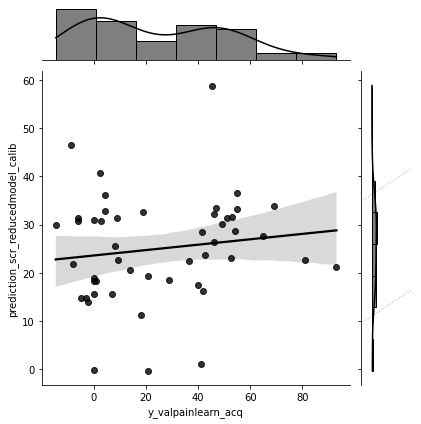

The left out connection: CER7b_m+COLsul
The number of features in the new model: 10
This is the reduction of explained variance(in 
absolute %,positive value means a drop while negative
 value means the expl variance increased when we omitted th region): 2.0


c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y.

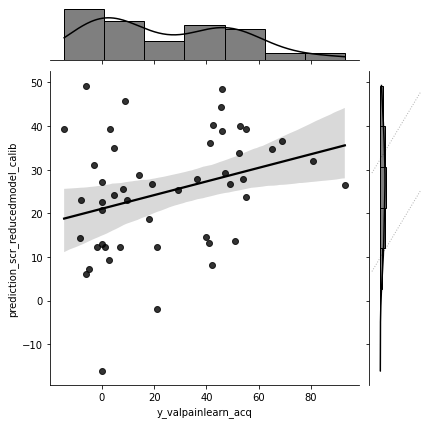

The left out connection: DVIS_vl+AMY
The number of features in the new model: 40
This is the reduction of explained variance(in 
absolute %,positive value means a drop while negative
 value means the expl variance increased when we omitted th region): 11.0


c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y.

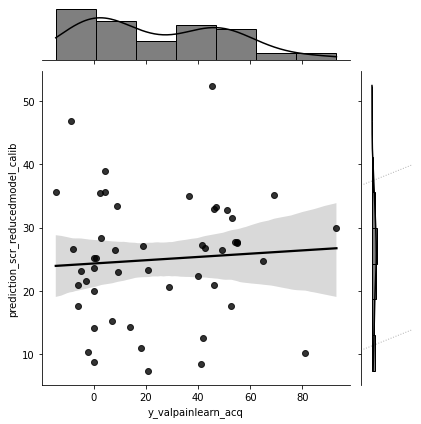

The left out connection: PINS_v+L_MOTnet_dl
The number of features in the new model: 40
This is the reduction of explained variance(in 
absolute %,positive value means a drop while negative
 value means the expl variance increased when we omitted th region): 10.0


c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y.

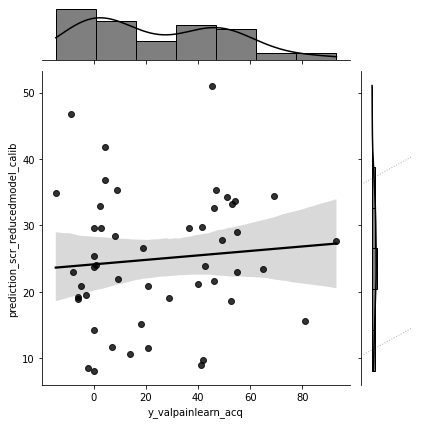

The left out connection: L_IPlob.1+IMsul
The number of features in the new model: 10
This is the reduction of explained variance(in 
absolute %,positive value means a drop while negative
 value means the expl variance increased when we omitted th region): 1.0


c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y.

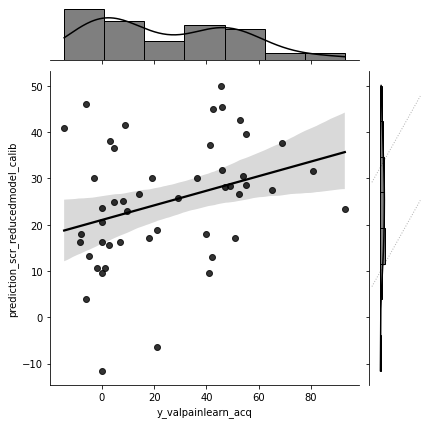

The left out connection: DMPFC_ar+STgyr_m
The number of features in the new model: 10
This is the reduction of explained variance(in 
absolute %,positive value means a drop while negative
 value means the expl variance increased when we omitted th region): -1.0


c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y.

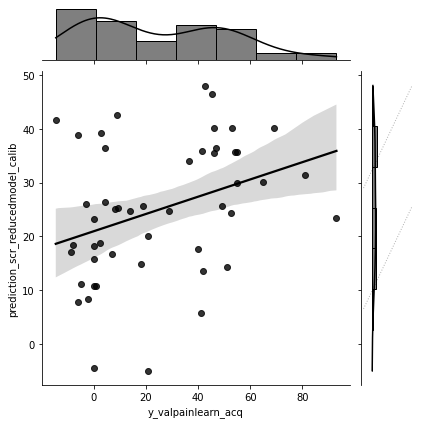

The left out connection: PUT_p+PVISnet_dm
The number of features in the new model: 10
This is the reduction of explained variance(in 
absolute %,positive value means a drop while negative
 value means the expl variance increased when we omitted th region): -2.0


c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y.

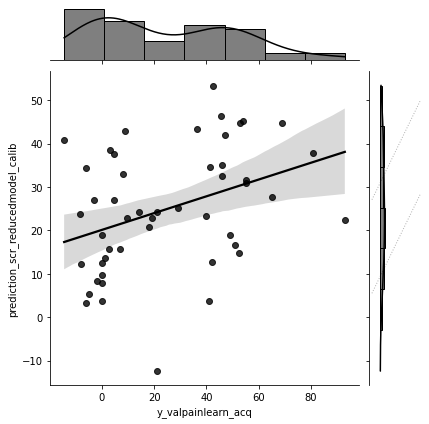

The left out connection: CER5+MVISnet_ad
The number of features in the new model: 10
This is the reduction of explained variance(in 
absolute %,positive value means a drop while negative
 value means the expl variance increased when we omitted th region): 6.0


c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y.

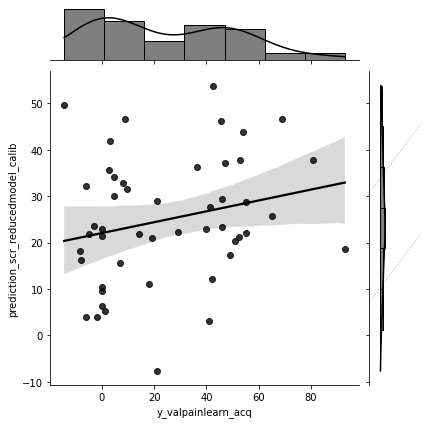

The left out connection: AINS_ad+LVISnet_DP
The number of features in the new model: 10
This is the reduction of explained variance(in 
absolute %,positive value means a drop while negative
 value means the expl variance increased when we omitted th region): -0.0


c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y.

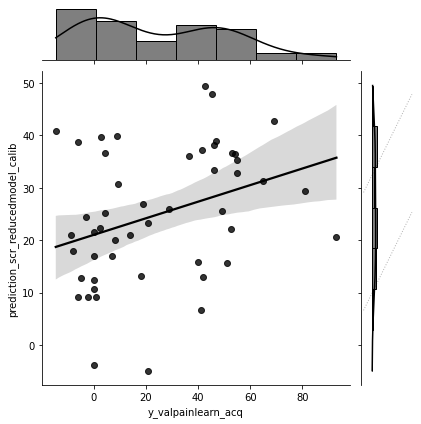

In [8]:
lefoutconnections=[]
explvarchanges_abs=[]
explvarchange_rel=[]

for modelidx, reducedmodel in enumerate(m0_scr_loof_all):
    obsval=concat_behav['y_valpainlearn_acq'] #s1_behav
    featurespc=concat_feature.to_numpy() #s1_features_scr

    featureidx=m_scr[0].get_support(indices=True)[modelidx]
    leftoutconn=vectorizedlabels[featureidx]
    print('The left out connection: '+str(leftoutconn))
    print('The number of features in the new model: '+str(len(reducedmodel[1].coef_)))

    #display(haj)
    reduced_featurespc = np.delete(featurespc,featureidx,axis=1)
    #predval=reducedmodel.predict(reduced_featurespc)
    concat_behav.loc[:,'prediction_scr_reducedmodel']=reducedmodel.predict(reduced_featurespc)
    concat_behav_red=samplecalibration(sample1=concat_behav.loc[concat_behav.study=='s1',:],
                      sample2=concat_behav.loc[concat_behav.study=='s2',:],
                      observedvar='y_valpainlearn_acq',
                      predictedvar='prediction_scr_reducedmodel')
    predval=concat_behav_red['prediction_scr_reducedmodel_calib']
    p_value_myml, r_2_myml, residual, regline = myml.pred_stat(obsval,
                                                           predval,
                                                            robust=False,
                                                           regside='greater')
    print("This is the reduction of explained variance(in \n"
          "absolute %,positive value means a drop while negative\n"
          " value means the expl variance increased when we omitted th region):",
          round(r2_orig-r_2_myml,2)*100)
    myml.plot_prediction(obsval,
                         predval)
    lefoutconnections.append(leftoutconn)
    explvarchanges_abs.append(round(r2_orig-r_2_myml,4)*100)
    explvarchange_rel.append(round((r2_orig-r_2_myml)/r2_orig,4)*100)

In [9]:
tableofexplvarloss={'conn': lefoutconnections,
           'ß': list(m_scr[1].coef_[idx] for idx,i in enumerate(m_scr[0].get_support(indices=True))),
           'rel_expvarchange':explvarchange_rel,
           'abs_expvarchange':explvarchanges_abs}
tableofexplvarloss=pd.DataFrame(tableofexplvarloss)
tableofexplvarloss.sort_values('abs_expvarchange',ascending=False)

,conn,ß,rel_expvarchange,abs_expvarchange
3,DVIS_vl+AMY,-79.285258,95.35,10.68
4,PINS_v+L_MOTnet_dl,84.359578,92.30,10.33
1,L_DVIS_v+R_PORB,-92.657756,83.02,9.30
8,CER5+MVISnet_ad,-80.804677,51.89,5.81
2,CER7b_m+COLsul,43.246548,14.03,1.57
5,L_IPlob.1+IMsul,48.375171,6.90,0.77
9,AINS_ad+LVISnet_DP,-30.534563,-1.05,-0.12
6,DMPFC_ar+STgyr_m,6.769029,-5.67,-0.63
0,POsul_v+SPlob.1,38.644228,-19.76,-2.21
7,PUT_p+PVISnet_dm,-49.246654,-20.50,-2.29


Visualize loo feature results for M_scr in the external sample


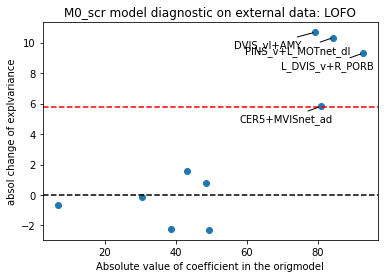

In [10]:
loofeaturetbl=tableofexplvarloss
print('Visualize loo feature results for M_scr in the external sample')

plt.scatter(abs(loofeaturetbl['ß']),
            (loofeaturetbl['abs_expvarchange']))


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=5.8, color='r', linestyle='--')
plt.ylabel('absol change of explvariance')
plt.xlabel('Absolute value of coefficient in the origmodel')
plt.title('M0_scr model diagnostic on external data: LOFO')
for i, txt in enumerate(loofeaturetbl['conn']):
    x = abs(loofeaturetbl.loc[i,'ß'])
    y = (loofeaturetbl.loc[i,'abs_expvarchange'])
    if y > 4:
        x_txtpos=-23
        y_txtpos=-1
        if i==4:
            x_txtpos=-25
            y_txtpos=-1

        plt.annotate(txt, (x, y),
                 xytext=(x+x_txtpos, y+y_txtpos),
                 arrowprops = dict(  arrowstyle="-"))

# Leave one region out

In [11]:
allroiinf = interestingrois(m_scr,listoflabelpairs,mistatlaslabel='../data_in/MIST_122.csv',doubledrois=['SPlob','L_IPlob'])
modelrois = []
for roiinf in allroiinf:
    modelrois.append(roiinf[0])
    modelrois.append(roiinf[1])
    #
expvar_results = pd.DataFrame(modelrois, columns=['regions'])

SPlob
L_IPlob
L_IPlob.1
These are the hyperparameters of our model (fulldata fit):{'k': 10, 'score_func': <function f_regression at 0x000001F636268C10>}
These are the weights of the most important connections which are between the two regions listed after the value:
['POsul_v', 'SPlob.1', 38.64422764426863]
['L_DVIS_v', 'R_PORB', -92.65775621474428]
['CER7b_m', 'COLsul', 43.24654838714946]
['DVIS_vl', 'AMY', -79.2852578666391]
['PINS_v', 'L_MOTnet_dl', 84.35957776544736]
['L_IPlob.1', 'IMsul', 48.37517144080124]
['DMPFC_ar', 'STgyr_m', 6.769028956019247]
['PUT_p', 'PVISnet_dm', -49.246653578154884]
['CER5', 'MVISnet_ad', -80.80467678564585]
['AINS_ad', 'LVISnet_DP', -30.534562645156438]
-----------------------------------------------------------------
The indices of interesting ROI pairs:
[array([[72]], dtype=int64), array([[76]], dtype=int64)]
[array([[50]], dtype=int64), array([[92]], dtype=int64)]
[array([[18]], dtype=int64), array([[79]], dtype=int64)]
[array([[100]], dtype=int64),

In [12]:
#for roiidx, eachroi in enumerate(timseries_exclroi):
timseries_exclroi=[]
timeseries_ofinterest=timeseries_s0 # this is the first output of the load_timeseries function and the input of the connectivity_matrix function.
loroall=[]
for roiinf in allroiinf:
    for i in range(0,2):
        ts_tmp = []
        for subjtimeseries in timeseries_ofinterest:
            tmpidxroi = labels.tolist().index(roiinf[i])
            ts_tmp.append(np.delete(subjtimeseries,tmpidxroi,1))

        timseries_exclroi.append(ts_tmp)
        X, cm = connectivity_matrix(ts_tmp)
    #    X, cm = connectivity_matrix(timseries_exclroi[0])
        # put here the
        s0_features_scr = pd.DataFrame(X,
                    index = s0_subjID_idx_incl.keys())
        y_reg = discovery_behav['y_valpainlearn_acq'].to_numpy()
        #y_reg = zscore(s0_behav['y_valpainlearn_acq'].to_numpy())
        X_reg = s0_features_scr.to_numpy() #s0_features

        mymodel, p_grid = myml.pipe_scale_fsel_ridge_noscaler()
        print('-'*65)
        print('This is the ROI which we left out', roiinf[i])
        moneregionexcl, moneregionexcl_predicted, moneregionexcl_explvar,\
        moneregionexcl_explvar_nonested, moneregionexcl_all_models,\
        moneregionexcl_mycrossval, moneregionexcl_myfig  = \
            myml.mytrain(X_reg,
                                y_reg,
                                mymodel,
                                p_grid, nested=False)
        #myprediction = myml.evaluate_crossval_prediction(m0_scr,X_reg, y_reg,outfile=[])
        #expvar_results.loc[expvar_results['regions']==roiinf[i],'expvar_nonnest'] = moneregionexcl_explvar_nonested
        loroall.append([moneregionexcl, moneregionexcl_predicted, moneregionexcl_explvar,\
        moneregionexcl_explvar_nonested, moneregionexcl_all_models,\
        moneregionexcl_mycrossval, moneregionexcl_myfig,roiinf[i]])

-----------------------------------------------------------------
This is the ROI which we left out POsul_v
**** Non-nested analysis ****
** Best hyperparameters: {'fsel__k': 30, 'model__alpha': 0.001}
** Score on full data as training set:	-0.16516453692831695
** Score on mean as model: -543.4399999999999
** Best Non-nested cross-validated score on test:	-265.5033462402166
XXXXX Explained Variance: 0.5114394482551585
-----------------------------------------------------------------
This is the ROI which we left out SPlob.1
**** Non-nested analysis ****
** Best hyperparameters: {'fsel__k': 10, 'model__alpha': 0.001}
** Score on full data as training set:	-16.349325178957873
** Score on mean as model: -543.4399999999999
** Best Non-nested cross-validated score on test:	-231.6121042134894
XXXXX Explained Variance: 0.5738037240293511
-----------------------------------------------------------------
This is the ROI which we left out L_DVIS_v
**** Non-nested analysis ****
** Best hyperparam

In [13]:

#for roiidx, eachroi in enumerate(timseries_exclroi):
timseries_exclroi=[]
timeseries_ofinterest=timeseries_vs1+timeseries_vs2 # this is the first output of the load_timeseries function and the input of the connectivity_matrix function.
#loroall=[]
y_reg = concat_behav['y_valpainlearn_acq'].to_numpy()
for roi in list(range(0,len(loroall))):
    #print('-'*65)
    #print(loroall[roi][7])
    ts_tmp = []
    for subjtimeseries in timeseries_ofinterest:
        tmpidxroi = labels.tolist().index(loroall[roi][7])
        ts_tmp.append(np.delete(subjtimeseries,tmpidxroi,1))

    timseries_exclroi.append(ts_tmp)
    X_reg, cm = connectivity_matrix(ts_tmp)
    loroall[roi].append([loroall[roi][0].predict(X_reg)])

c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


This is the reduction of explained variance(in 
absolute %,positive value means a drop while negative
 value means the expl variance increased when we omitted th region): 8.0


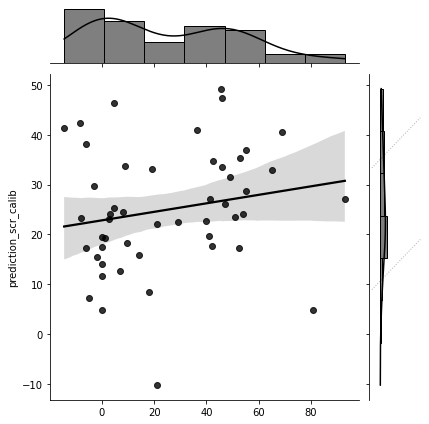

c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


This is the reduction of explained variance(in 
absolute %,positive value means a drop while negative
 value means the expl variance increased when we omitted th region): -5.0


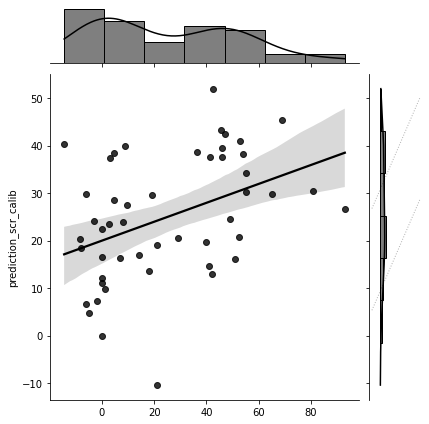

c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


This is the reduction of explained variance(in 
absolute %,positive value means a drop while negative
 value means the expl variance increased when we omitted th region): 6.0


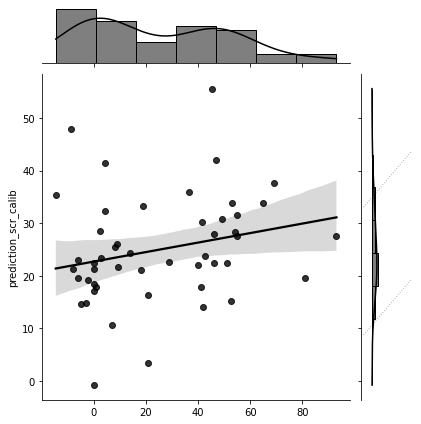

c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


This is the reduction of explained variance(in 
absolute %,positive value means a drop while negative
 value means the expl variance increased when we omitted th region): 7.000000000000001


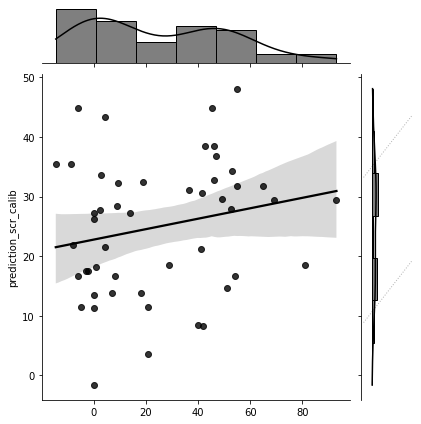

c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


This is the reduction of explained variance(in 
absolute %,positive value means a drop while negative
 value means the expl variance increased when we omitted th region): -0.0


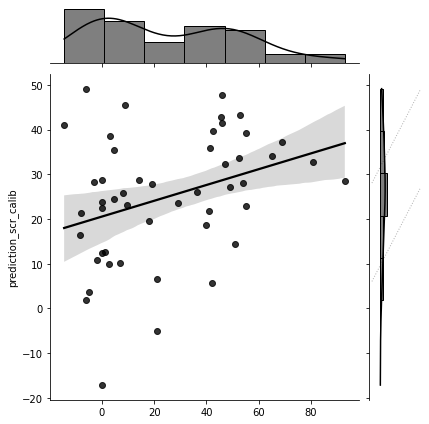

c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


This is the reduction of explained variance(in 
absolute %,positive value means a drop while negative
 value means the expl variance increased when we omitted th region): 0.0


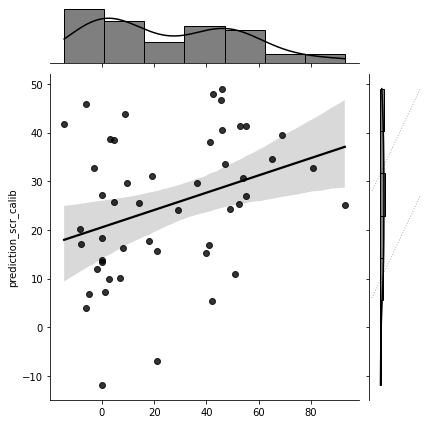

c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


This is the reduction of explained variance(in 
absolute %,positive value means a drop while negative
 value means the expl variance increased when we omitted th region): 6.0


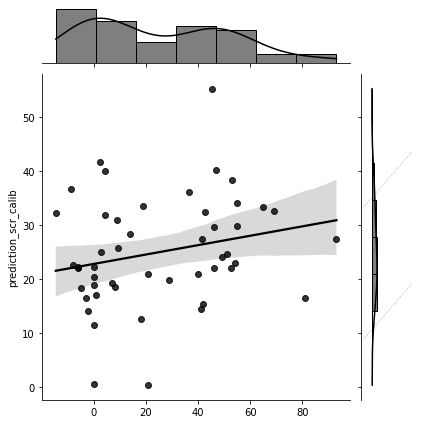

c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


This is the reduction of explained variance(in 
absolute %,positive value means a drop while negative
 value means the expl variance increased when we omitted th region): 10.0


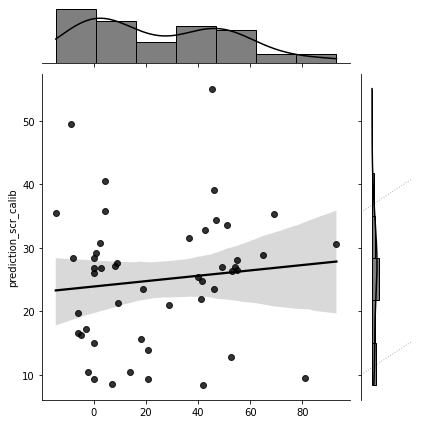

c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


This is the reduction of explained variance(in 
absolute %,positive value means a drop while negative
 value means the expl variance increased when we omitted th region): 9.0


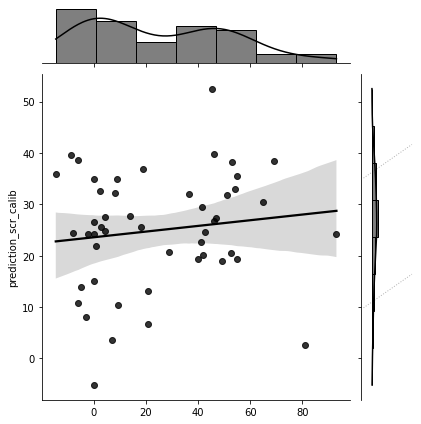

c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


This is the reduction of explained variance(in 
absolute %,positive value means a drop while negative
 value means the expl variance increased when we omitted th region): 8.0


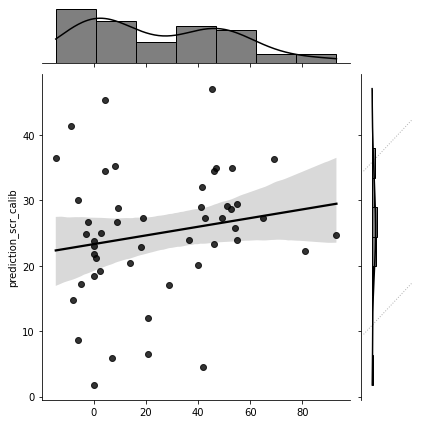

c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


This is the reduction of explained variance(in 
absolute %,positive value means a drop while negative
 value means the expl variance increased when we omitted th region): -0.0


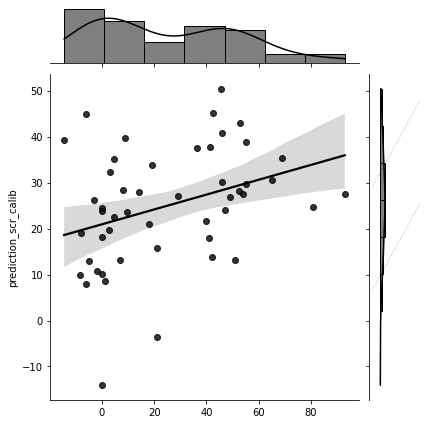

c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


This is the reduction of explained variance(in 
absolute %,positive value means a drop while negative
 value means the expl variance increased when we omitted th region): -2.0


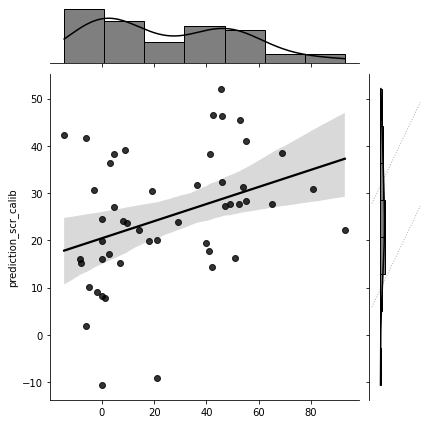

c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


This is the reduction of explained variance(in 
absolute %,positive value means a drop while negative
 value means the expl variance increased when we omitted th region): 2.0


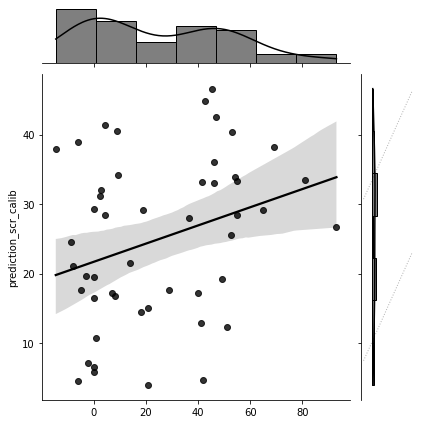

c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


This is the reduction of explained variance(in 
absolute %,positive value means a drop while negative
 value means the expl variance increased when we omitted th region): 6.0


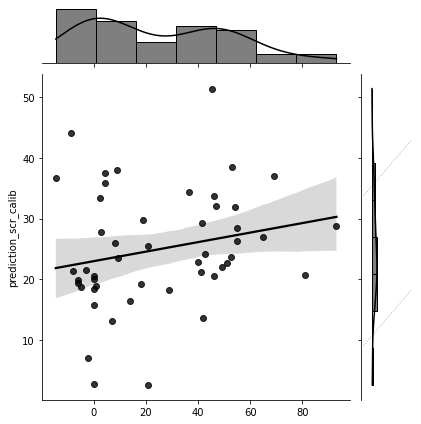

c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


This is the reduction of explained variance(in 
absolute %,positive value means a drop while negative
 value means the expl variance increased when we omitted th region): 6.0


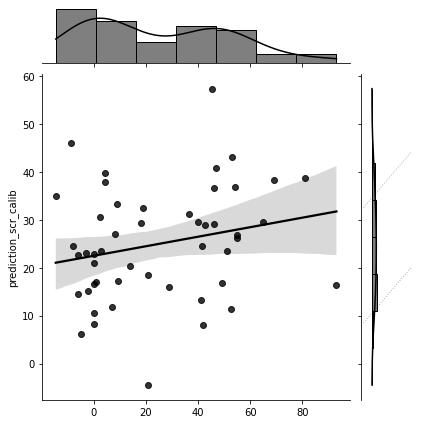

c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


This is the reduction of explained variance(in 
absolute %,positive value means a drop while negative
 value means the expl variance increased when we omitted th region): -3.0


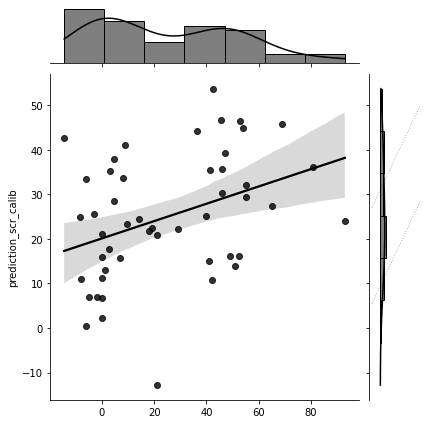

c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


This is the reduction of explained variance(in 
absolute %,positive value means a drop while negative
 value means the expl variance increased when we omitted th region): 3.0


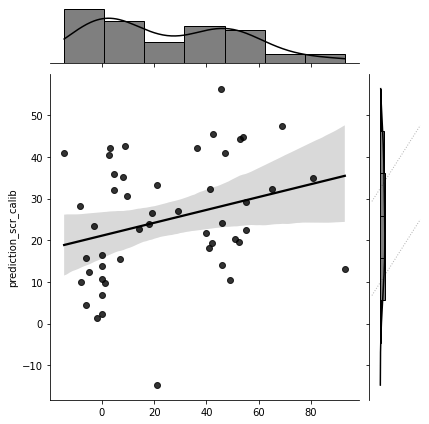

c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


This is the reduction of explained variance(in 
absolute %,positive value means a drop while negative
 value means the expl variance increased when we omitted th region): 11.0


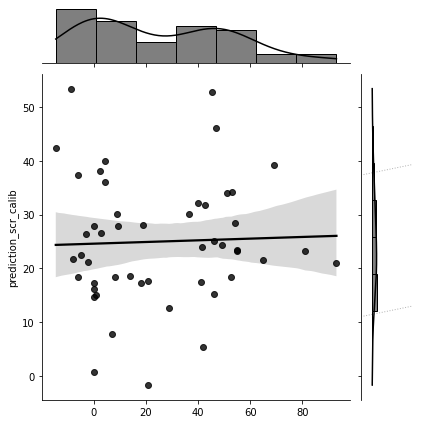

c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


This is the reduction of explained variance(in 
absolute %,positive value means a drop while negative
 value means the expl variance increased when we omitted th region): 3.0


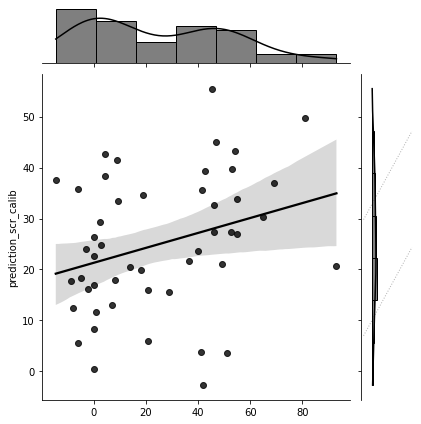

c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


This is the reduction of explained variance(in 
absolute %,positive value means a drop while negative
 value means the expl variance increased when we omitted th region): 2.0


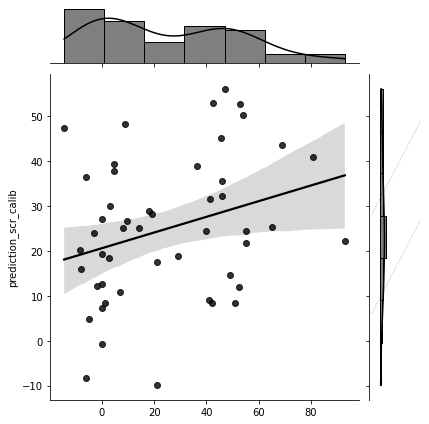

In [14]:
obsval = concat_behav['y_valpainlearn_acq'].to_numpy()
loro_tbl=[]
for kk in list(range(0,len(loroall))):
    y_loro=pd.DataFrame(np.hstack([np.atleast_2d(obsval).T,np.atleast_2d(loroall[kk][8]).T]),
                 columns=['y_valpainlearn_acq','prediction_scr'])
    concat_behav_red=samplecalibration(sample1=y_loro.iloc[0:25,],
                          sample2=y_loro.iloc[25:,],
                          observedvar='y_valpainlearn_acq',
                          predictedvar='prediction_scr')
    predval=concat_behav_red['prediction_scr_calib']
    p_value_myml, r_2_myml, residual, regline = myml.pred_stat(obsval,
                                                           predval,
                                                            robust=False,
                                                           regside='greater')
    print("This is the reduction of explained variance(in \n"
          "absolute %,positive value means a drop while negative\n"
          " value means the expl variance increased when we omitted th region):",
          round(r2_orig-r_2_myml,2)*100)
    myml.plot_prediction(obsval,
                         predval)
    loro_tbl.append([loroall[kk][7],
                     round(r2_orig-r_2_myml,4)*100,
                     round((r2_orig-r_2_myml)/r2_orig,4)*100])

In [15]:
exploss=pd.DataFrame(loro_tbl,columns=['ROI','absexclloss','relexlcloss'])#.sort_values(by=['absexclloss'],ascending=False)
exploss

,ROI,absexclloss,relexlcloss
0,POsul_v,7.65,68.33
1,SPlob.1,-5.45,-48.68
2,L_DVIS_v,5.56,49.61
3,R_PORB,6.87,61.33
4,CER7b_m,-0.09,-0.84
5,COLsul,0.15,1.33
6,DVIS_vl,5.90,52.65
7,AMY,9.98,89.11
8,PINS_v,9.44,84.27
9,L_MOTnet_dl,7.84,70.02
